In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('Hitting.csv')



In [3]:
#looking to see if there are any null values in the dataset 
df.isnull().sum()

Player    0
AVG       0
OPS       0
GP        0
AB        0
R         0
H         0
2B        0
3B        0
HR        0
RBI       0
TB        5
SLG%      0
BB        0
HBP       0
SO        0
OB%       0
dtype: int64

In [4]:
#Dropping duplicate rows
df.drop([14], inplace = True)

In [5]:
#copying df
TB_df = df.copy(deep = True)

In [6]:
TB_df

,Player,AVG,OPS,GP,AB,R,H,2B,3B,HR,RBI,TB,SLG%,BB,HBP,SO,OB%
0,"Tuffy, McGwire (Quinnipiac)",0.238,0.703,35,105,22,25,2,1,1,10,32.0,0.305,14,14,26,0.398
1,"Krzeminski, Gibson (Canisius)",0.242,0.809,34,99,19,24,4,1,6,16,48.0,0.485,10,2,32,0.324
2,Bryce Mordecki (Siena),0.222,0.662,35,99,14,22,3,0,3,20,34.0,0.343,12,2,38,0.319
3,"LaChance, Sam (Quinnipiac)",0.202,0.670,34,99,20,20,3,0,4,16,35.0,0.354,11,6,32,0.316
4,"Mendoza, Vicente (Iona)",0.144,0.430,39,90,5,13,2,0,1,2,18.0,0.200,4,6,36,0.230
5,"Mauro, Vincent (Niagara)",0.174,0.559,34,86,11,15,2,1,2,9,25.0,0.291,10,1,46,0.268
6,Cole Watson (Saint Peter's),0.179,0.554,34,84,16,15,3,0,0,7,18.0,0.214,16,5,36,0.340
7,Joey Vitiello (Saint Peter's),0.193,0.506,39,83,15,16,1,1,0,5,19.0,0.229,7,3,28,0.277
8,Nathan Lincoln (Marist),0.293,0.774,35,82,25,24,4,1,0,7,30.0,0.366,13,3,20,0.408
9,Niko Amory (Marist),0.213,0.667,32,80,13,17,2,0,2,16,25.0,0.313,15,3,31,0.354


In [7]:
#dropping rows that already have 'TB'
tB = TB_df.drop(index=[0,1,2,3,4,5,6,7,8,9,10,16,17,18,19])
tB

,Player,AVG,OPS,GP,AB,R,H,2B,3B,HR,RBI,TB,SLG%,BB,HBP,SO,OB%
11,Eric Marasheski,0.303,0.875,32,99,16,30,4,1,3,13,NaN,0.455,11,9,38,0.420
12,Ryan Ross,0.191,0.715,29,89,15,17,4,2,3,14,NaN,0.382,14,5,39,0.333
13,James Williams III,0.309,0.884,31,97,11,30,7,1,2,14,NaN,0.464,20,0,20,0.420
15,Bobby Grimes,0.222,0.680,39,99,21,22,1,1,1,9,NaN,0.283,25,5,37,0.397


In [8]:
eric1B = tB.loc[11].at['H']
eric2B = tB.loc[11].at['2B']
eric3B = tB.loc[11].at['3B']
ericHR = tB.loc[11].at['HR']

In [9]:
ryan1B = tB.loc[12].at['H']
ryan2B = tB.loc[12].at['2B']
ryan3B = tB.loc[12].at['3B']
ryanHR = tB.loc[12].at['HR']

In [10]:
james1B = tB.loc[13].at['H']
james2B = tB.loc[13].at['2B']
james3B = tB.loc[13].at['3B']
jamesHR = tB.loc[13].at['HR']

In [11]:
bobby1B = tB.loc[15].at['H']
bobby2B = tB.loc[15].at['2B']
bobby3B = tB.loc[15].at['3B']
bobbyHR = tB.loc[15].at['HR']

In [12]:
#Finding total bases 
#totalbase = (1b * 1) + (2b * 2) + (3b * 3) + (hr * 4)

erictb = (eric1B* 1) + (eric2B * 2) + (eric3B * 3) + (ericHR * 4)
print( erictb)

ryantb = (ryan1B* 1) + (ryan2B * 2) + (ryan3B * 3) + (ryanHR * 4)
print(ryantb)

jamestb = (james1B* 1) + (james2B * 2) + (james3B * 3) + (jamesHR * 4)
print(jamestb)

bobbytb = (bobby1B* 1) + (bobby2B * 2) + (bobby3B * 3) + (bobbyHR * 4)
print(bobbytb)

53
43
55
31


In [13]:
df.iat[11,11] = 53
df.iat[12,11] = 43
df.iat[13,11] = 55
df.iat[14,11] = 31


In [14]:
df.iloc[14][11]

31.0

In [15]:
df

,Player,AVG,OPS,GP,AB,R,H,2B,3B,HR,RBI,TB,SLG%,BB,HBP,SO,OB%
0,"Tuffy, McGwire (Quinnipiac)",0.238,0.703,35,105,22,25,2,1,1,10,32.0,0.305,14,14,26,0.398
1,"Krzeminski, Gibson (Canisius)",0.242,0.809,34,99,19,24,4,1,6,16,48.0,0.485,10,2,32,0.324
2,Bryce Mordecki (Siena),0.222,0.662,35,99,14,22,3,0,3,20,34.0,0.343,12,2,38,0.319
3,"LaChance, Sam (Quinnipiac)",0.202,0.670,34,99,20,20,3,0,4,16,35.0,0.354,11,6,32,0.316
4,"Mendoza, Vicente (Iona)",0.144,0.430,39,90,5,13,2,0,1,2,18.0,0.200,4,6,36,0.230
5,"Mauro, Vincent (Niagara)",0.174,0.559,34,86,11,15,2,1,2,9,25.0,0.291,10,1,46,0.268
6,Cole Watson (Saint Peter's),0.179,0.554,34,84,16,15,3,0,0,7,18.0,0.214,16,5,36,0.340
7,Joey Vitiello (Saint Peter's),0.193,0.506,39,83,15,16,1,1,0,5,19.0,0.229,7,3,28,0.277
8,Nathan Lincoln (Marist),0.293,0.774,35,82,25,24,4,1,0,7,30.0,0.366,13,3,20,0.408
9,Niko Amory (Marist),0.213,0.667,32,80,13,17,2,0,2,16,25.0,0.313,15,3,31,0.354


In [16]:
#looking at the average hits 
mean_h = df['H'].mean()
print(round(mean_h))

#looking at median of hits
median_h = df['H'].median()
print(median_h)

#looking at minimum amount of hits
min_h = df['H'].min()
print(min_h)

#looking at maximum amount of hits
max_h = df['H'].max()
print(max_h)

20
20.0
11
30


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Micahl DeRosa\AppData\Local\Temp\ipykernel_6596\1341932778.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  model_1.set_xticklabels(df['Player'], rotation=90 )


[Text(0, 0, 'Tuffy, McGwire (Quinnipiac)'),
 Text(1, 0, 'Krzeminski, Gibson (Canisius)'),
 Text(2, 0, 'Bryce Mordecki (Siena)'),
 Text(3, 0, 'LaChance, Sam (Quinnipiac)'),
 Text(4, 0, 'Mendoza, Vicente (Iona)'),
 Text(5, 0, 'Mauro, Vincent (Niagara)'),
 Text(6, 0, "Cole Watson (Saint Peter's)"),
 Text(7, 0, "Joey Vitiello (Saint Peter's)"),
 Text(8, 0, 'Nathan Lincoln (Marist)'),
 Text(9, 0, 'Niko Amory (Marist)'),
 Text(10, 0, 'Chris Erickson (Siena)'),
 Text(11, 0, 'Eric Marasheski'),
 Text(12, 0, 'Ryan Ross'),
 Text(13, 0, 'James Williams III'),
 Text(14, 0, 'Bobby Grimes'),
 Text(15, 0, 'LaChance, Sam'),
 Text(16, 0, 'DeRosa, Matt'),
 Text(17, 0, 'Mueller, Sebastian'),
 Text(18, 0, 'McDermott, Andrew')]

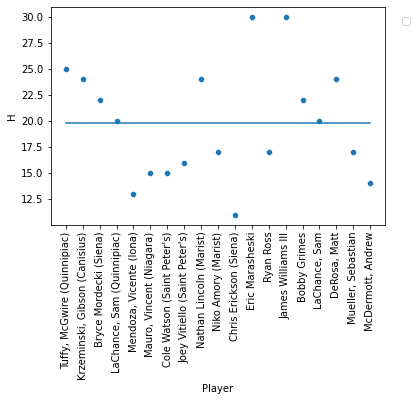

In [17]:
model_1 = sb.scatterplot(data= df, x = 'Player', y = 'H')

mean_line = sb.lineplot(data = df, x ='Player', y = mean_h)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=1)
model_1.set_xticklabels(df['Player'], rotation=90 )

In [18]:
#looking at the average double 
mean_2B = df['2B'].mean()
print(round(mean_2B))

#looking at median of doubles
median_2B = df['2B'].median()
print(median_2B)

#looking at minimum amount of doubles
min_2B = df['2B'].min()
print(min_2B)

#looking at maximum amount of doubles
max_2B = df['2B'].max()
print(max_2B)

3
3.0
1
7


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Micahl DeRosa\AppData\Local\Temp\ipykernel_6596\667190904.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  model_2.set_xticklabels(df['Player'], rotation=90 )


[Text(0, 0, 'Tuffy, McGwire (Quinnipiac)'),
 Text(1, 0, 'Krzeminski, Gibson (Canisius)'),
 Text(2, 0, 'Bryce Mordecki (Siena)'),
 Text(3, 0, 'LaChance, Sam (Quinnipiac)'),
 Text(4, 0, 'Mendoza, Vicente (Iona)'),
 Text(5, 0, 'Mauro, Vincent (Niagara)'),
 Text(6, 0, "Cole Watson (Saint Peter's)"),
 Text(7, 0, "Joey Vitiello (Saint Peter's)"),
 Text(8, 0, 'Nathan Lincoln (Marist)'),
 Text(9, 0, 'Niko Amory (Marist)'),
 Text(10, 0, 'Chris Erickson (Siena)'),
 Text(11, 0, 'Eric Marasheski'),
 Text(12, 0, 'Ryan Ross'),
 Text(13, 0, 'James Williams III'),
 Text(14, 0, 'Bobby Grimes'),
 Text(15, 0, 'LaChance, Sam'),
 Text(16, 0, 'DeRosa, Matt'),
 Text(17, 0, 'Mueller, Sebastian'),
 Text(18, 0, 'McDermott, Andrew')]

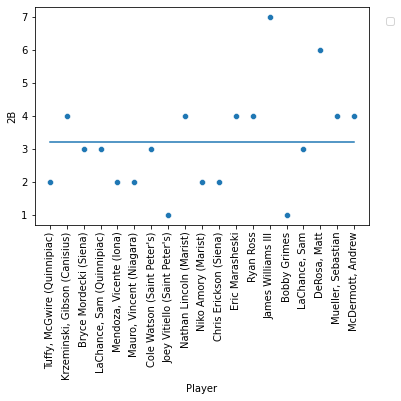

In [19]:
model_2 = sb.scatterplot(data= df, x = 'Player', y = '2B')

mean_line2 = sb.lineplot(data = df, x ='Player', y = mean_2B)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=1)
model_2.set_xticklabels(df['Player'], rotation=90 )



In [25]:
#looking at ONBASE %
OB_max = df['OB%'].max()
print(round(OB_max,3))

OB_min = df['OB%'].min()
print(round(OB_min,3))

OB_median = df['OB%'].median()
print( round(OB_median,3))

OB_mean = df['OB%'].mean()
print(round(OB_mean,3))

0.42
0.23
0.326
0.336


In [26]:
#looking at batting averages from highest to lowest
df_average = df.sort_values(by='AVG', ascending=False)
df_average

,Player,AVG,OPS,GP,AB,R,H,2B,3B,HR,RBI,TB,SLG%,BB,HBP,SO,OB%
13,James Williams III,0.309,0.884,31,97,11,30,7,1,2,14,55.0,0.464,20,0,20,0.420
11,Eric Marasheski,0.303,0.875,32,99,16,30,4,1,3,13,53.0,0.455,11,9,38,0.420
8,Nathan Lincoln (Marist),0.293,0.774,35,82,25,24,4,1,0,7,30.0,0.366,13,3,20,0.408
17,"DeRosa, Matt",0.286,0.719,27,84,10,24,6,0,1,9,33.0,0.393,4,1,11,0.326
1,"Krzeminski, Gibson (Canisius)",0.242,0.809,34,99,19,24,4,1,6,16,48.0,0.485,10,2,32,0.324
0,"Tuffy, McGwire (Quinnipiac)",0.238,0.703,35,105,22,25,2,1,1,10,32.0,0.305,14,14,26,0.398
19,"McDermott, Andrew",0.237,0.815,29,59,11,14,4,0,2,12,24.0,0.407,13,4,22,0.408
15,Bobby Grimes,0.222,0.680,39,99,21,22,1,1,1,9,31.0,0.283,25,5,37,0.397
2,Bryce Mordecki (Siena),0.222,0.662,35,99,14,22,3,0,3,20,34.0,0.343,12,2,38,0.319
18,"Mueller, Sebastian",0.215,0.667,26,79,5,17,4,0,3,15,30.0,0.380,5,3,20,0.287


In [28]:
#looking at RBI's from highest to lowest 
df_rbi = df.sort_values(by='RBI', ascending=False)
df_rbi

,Player,AVG,OPS,GP,AB,R,H,2B,3B,HR,RBI,TB,SLG%,BB,HBP,SO,OB%
2,Bryce Mordecki (Siena),0.222,0.662,35,99,14,22,3,0,3,20,34.0,0.343,12,2,38,0.319
9,Niko Amory (Marist),0.213,0.667,32,80,13,17,2,0,2,16,25.0,0.313,15,3,31,0.354
1,"Krzeminski, Gibson (Canisius)",0.242,0.809,34,99,19,24,4,1,6,16,48.0,0.485,10,2,32,0.324
3,"LaChance, Sam (Quinnipiac)",0.202,0.670,34,99,20,20,3,0,4,16,35.0,0.354,11,6,32,0.316
16,"LaChance, Sam",0.202,0.670,34,99,20,20,3,0,4,16,35.0,0.354,11,6,32,0.316
18,"Mueller, Sebastian",0.215,0.667,26,79,5,17,4,0,3,15,30.0,0.380,5,3,20,0.287
13,James Williams III,0.309,0.884,31,97,11,30,7,1,2,14,55.0,0.464,20,0,20,0.420
12,Ryan Ross,0.191,0.715,29,89,15,17,4,2,3,14,43.0,0.382,14,5,39,0.333
11,Eric Marasheski,0.303,0.875,32,99,16,30,4,1,3,13,53.0,0.455,11,9,38,0.420
19,"McDermott, Andrew",0.237,0.815,29,59,11,14,4,0,2,12,24.0,0.407,13,4,22,0.408


In [32]:
#looking at homeruns
HR_max = df['HR'].max()
print(HR_max)

HR_min = df['HR'].min()
print(HR_min)

HR_median = df['HR'].median()
print(HR_median)

HR_mean = df['HR'].mean()
print(round(HR_mean))


6
0
2.0
2
